In [15]:
class LogikaFuzzy():

    def __init__(self):
        self.min = 0
        self.max = 0

    def down(self, x):
        return (self.max - x) / (self.max - self.min)

    def up(self, x):
        return (x - self.min) / (self.max - self.min)

    def rev_down(self, f):
        return self.max - f * (self.max - self.min)

    def rev_up(self, f):
        return f * (self.max - self.min) + self.min
# Down
# f = (max - x) / (max - min)
# f * (max - min) = max - x
# f * (max - min) - max = -x
# max - f * (max - min) = x
# x = max - f * (max - min)

# Up
# f = (x - min) / (max - min)
# f * (max - min) = x - min
# f * (max - min) + min = x
# x = f * (max - min) + min

In [16]:
# Permintaan
# himp Turun / Naik
fis = LogikaFuzzy()
fis.min = 1000
fis.max = 5000
x = 4000
# Turun
turun = fis.down(x)
print(f"Turun: {turun}")

# Turun
naik = fis.up(x)
print(f"Naik: {naik}")

Turun: 0.25
Naik: 0.75


In [17]:
# Persediaan
# himp Sedikit / Banyak
fis = LogikaFuzzy()
fis.min = 100
fis.max = 600
x = 300

# Sedikit
sedikit = fis.down(x)
print(f"Sedikit: {sedikit}")

# Banyak
banyak = fis.up(x)
print(f"Banyak: {banyak}")

Sedikit: 0.6
Banyak: 0.4


In [18]:
# Berkurang 0.25 >> 5750
# Bertambah 0.4 >> 4000
# Bertambah 0.5 >> 5000

fis = LogikaFuzzy()
fis.min = 2000
fis.max = 7000

# Berkurang
f = 0.25
berkurang = fis.rev_down(f)
print(f"berkurang({f}): {berkurang}")

# Bertambah
f = 0.4
bertambah = fis.rev_up(f)
print(f"bertambah({f}): {bertambah}")

f = 0.6
bertambah = fis.rev_up(f)
print(f"bertambah({f}): {bertambah}")

berkurang(0.25): 5750.0
bertambah(0.4): 4000.0
bertambah(0.6): 5000.0


In [19]:
# Permintaan = Demand
# turun = decrease
# naik = increase
# Persediaan = Stock
# sedikit = a_few
# banyak = a_lot
# Produksi = Production
# berkurang = reduce
# bertambah = add

In [20]:
class Demand(LogikaFuzzy):

    def __init__(self):
        self.min = 1000
        self.max = 5000

    def decrease(self, x):
        if x < self.min:
            return 1

        if x > self.max:
            return 0

        return self.down(x)

    def increase(self, x):
        if x < self.min:
            return 0

        if x > self.max:
            return 1
            
        return self.up(x)

class Stock(LogikaFuzzy):

    def __init__(self):
        self.min = 100
        self.max = 600

    def a_few(self, x):
        if x < self.min:
            return 1

        if x > self.max:
            return 0

        return self.down(x)
    def a_lot(self, x):
        if x < self.min:
            return 0

        if x > self.max:
            return 1
            
        return self.up(x)

class Production(LogikaFuzzy):

    def __init__(self):
        self.min = 2000
        self.max = 7000

    def reduce(self, fuzzy_value):
        return self.rev_down(fuzzy_value)

    def add(self, fuzzy_value):
        return self.rev_up(fuzzy_value)

In [21]:
pmt = Demand()
pmt.increase(5000)

1.0

In [22]:
psd = Stock()
psd.a_lot(450)

0.7

In [23]:
prod = Production()
prod.add(0.6)

5000.0

In [24]:
rule_mapping = {
    ("decrease", "a_lot"): "reduce",
    ("decrease", "a_few"): "reduce",
    ("increase", "a_lot"): "add",
    ("increase", "a_few"): "add",
}

In [25]:
total_value = 0
total_fuzzy = 0
for k, v in rule_mapping.items():
    # print(f"{k[0]=}, {k[1]=}")
    # print(f"{v=}")
    demand = Demand()
    stock = Stock()
    demand_value = 4000
    stock_value = 300

    fuzzy_demand = demand.decrease(demand_value) if k[0] == "decrease" else demand.increase(demand_value)
    fuzzy_stock = stock.a_few(stock_value) if k[1] == "a_few" else stock.a_lot(stock_value)

    prod = Production()
    fuzzy_prod = min(fuzzy_demand, fuzzy_stock)
    prod_value = prod.reduce(fuzzy_prod) if v == "reduce" else prod.add(fuzzy_prod)

    total_value += fuzzy_prod * prod_value
    total_fuzzy += fuzzy_prod

result = int(total_value/ total_fuzzy)
result
print(f"Jadi, jumlah makanan jenis ABC yang harus diproduksi sebanyak {result} kemasan.")

Jadi, jumlah makanan jenis ABC yang harus diproduksi sebanyak 4983 kemasan.


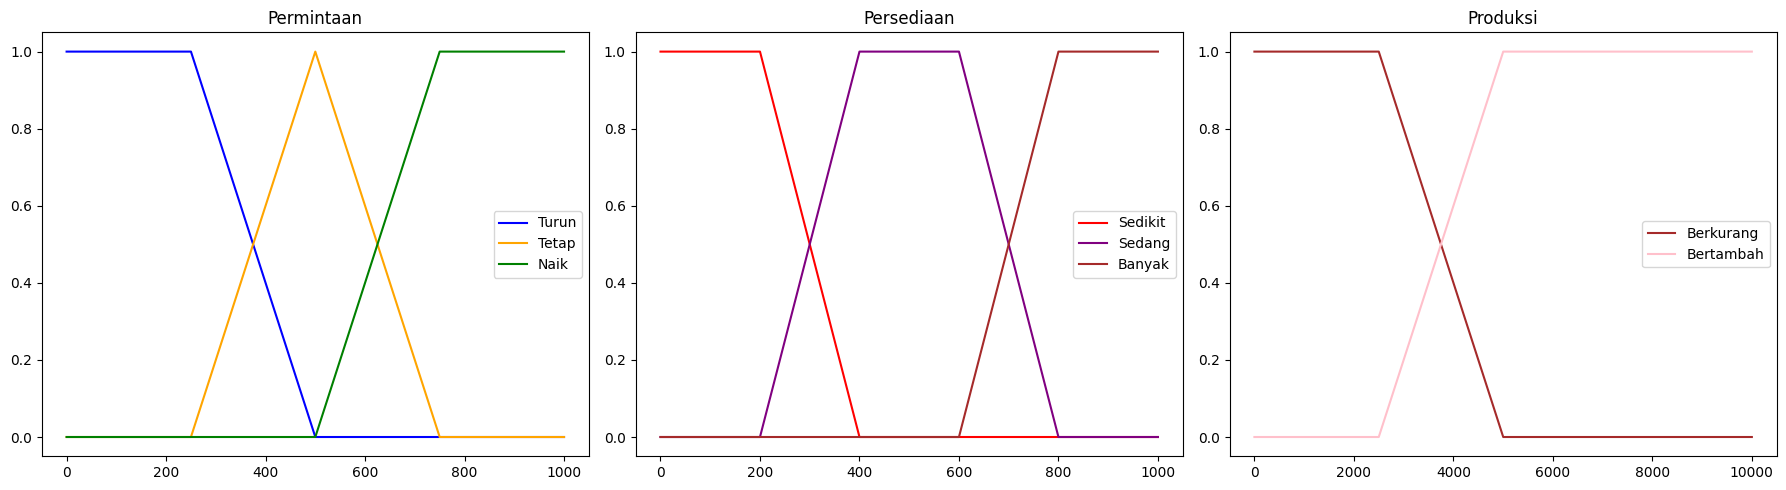

Hasil Produksi Defuzzifikasi: 2500.00


In [33]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Variabel Fuzzy
x_permintaan = np.arange(0, 1001, 1)  # Permintaan (0 hingga 1000)
x_persediaan = np.arange(0, 1001, 1)  # Persediaan (0 hingga 1000)
x_produksi = np.arange(0, 10001, 1)   # Produksi (0 hingga 10000)

# Fungsi Keanggotaan untuk Permintaan
permintaan_turun = fuzz.trapmf(x_permintaan, [0, 0, 250, 500])
permintaan_tetap = fuzz.trapmf(x_permintaan, [250, 500, 500, 750])
permintaan_naik = fuzz.trapmf(x_permintaan, [500, 750, 1000, 1000])

# Fungsi Keanggotaan untuk Persediaan
persediaan_sedikit = fuzz.trapmf(x_persediaan, [0, 0, 200, 400])
persediaan_sedang = fuzz.trapmf(x_persediaan, [200, 400, 600, 800])
persediaan_banyak = fuzz.trapmf(x_persediaan, [600, 800, 1000, 1000])

# Fungsi Keanggotaan untuk Produksi
produksi_berkurang = fuzz.trapmf(x_produksi, [0, 0, 2500, 5000])
produksi_bertambah = fuzz.trapmf(x_produksi, [2500, 5000, 10000, 10000])

# Visualisasi fungsi keanggotaan
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
ax1.plot(x_permintaan, permintaan_turun, 'b', label='Turun')
ax1.plot(x_permintaan, permintaan_tetap, 'orange', label='Tetap')
ax1.plot(x_permintaan, permintaan_naik, 'g', label='Naik')
ax1.set_title('Permintaan')
ax1.legend()

ax2.plot(x_persediaan, persediaan_sedikit, 'r', label='Sedikit')
ax2.plot(x_persediaan, persediaan_sedang, 'purple', label='Sedang')
ax2.plot(x_persediaan, persediaan_banyak, 'brown', label='Banyak')
ax2.set_title('Persediaan')
ax2.legend()

ax3.plot(x_produksi, produksi_berkurang, 'brown', label='Berkurang')
ax3.plot(x_produksi, produksi_bertambah, 'pink', label='Bertambah')
ax3.set_title('Produksi')
ax3.legend()

plt.tight_layout()
plt.show()

# Contoh Input
permintaan_input = 300
persediaan_input = 500

# Fuzzifikasi
permintaan_turun_degree = fuzz.interp_membership(x_permintaan, permintaan_turun, permintaan_input)
permintaan_tetap_degree = fuzz.interp_membership(x_permintaan, permintaan_tetap, permintaan_input)
permintaan_naik_degree = fuzz.interp_membership(x_permintaan, permintaan_naik, permintaan_input)

persediaan_sedikit_degree = fuzz.interp_membership(x_persediaan, persediaan_sedikit, persediaan_input)
persediaan_sedang_degree = fuzz.interp_membership(x_persediaan, persediaan_sedang, persediaan_input)
persediaan_banyak_degree = fuzz.interp_membership(x_persediaan, persediaan_banyak, persediaan_input)

# Inferensi Fuzzy
rule1 = min(permintaan_turun_degree, persediaan_sedikit_degree)  # Produksi Bertambah
rule2 = min(permintaan_turun_degree, persediaan_sedang_degree)  # Produksi Berkurang
rule3 = min(permintaan_turun_degree, persediaan_banyak_degree)  # Produksi Berkurang
rule4 = min(permintaan_tetap_degree, persediaan_sedikit_degree)  # Produksi Bertambah
rule5 = min(permintaan_tetap_degree, persediaan_sedang_degree)  # Produksi Berkurang
rule6 = min(permintaan_tetap_degree, persediaan_banyak_degree)  # Produksi Berkurang
rule7 = min(permintaan_naik_degree, persediaan_sedikit_degree)  # Produksi Bertambah
rule8 = min(permintaan_naik_degree, persediaan_sedang_degree)  # Produksi Bertambah
rule9 = min(permintaan_naik_degree, persediaan_banyak_degree)  # Produksi Berkurang

# Defuzzifikasi (Metode Tsukamoto)
z1 = 7500  # Produksi bertambah
z2 = 2500  # Produksi berkurang

numerator = (rule1 * z1 + rule2 * z2 + rule3 * z2 + rule4 * z1 +
             rule5 * z2 + rule6 * z2 + rule7 * z1 + rule8 * z1 + rule9 * z2)
denominator = (rule1 + rule2 + rule3 + rule4 + rule5 + rule6 + rule7 + rule8 + rule9)

produksi_defuzzified = numerator / denominator if denominator != 0 else 0

print(f"Hasil Produksi Defuzzifikasi: {produksi_defuzzified:.2f}")
